In [1]:
import pandas as pd

folder = './data/'
filename = 'ev_scale.xlsx'
df = pd.read_excel(folder+filename)
# df.columns = ['size', 'number', 'concentration', 'volume', 'area']
df.head()

,Depth,Name,Statistic,#Cells
0,NaN,A1 Well_001.fcs,NaN,139536
1,>,A1 Well_001.fcs/Lymphocytes,15.0,20908
2,> >,A1 Well_001.fcs/Lymphocytes/Single Cells,77.2,16131
3,> > >,A1 Well_001.fcs/Lymphocytes/Single Cells/Singl...,90.7,14633
4,> > > >,A1 Well_001.fcs/Lymphocytes/Single Cells/Singl...,93.2,13638


# Cell Populations

## Plate 1

- A+B = Peripheral Blood
- C+D = Spleen
- E+F = Bone Marrow
- G+H = None

## Plate 2

- A+B = Lymph node
- C+D = Thymus
- E+F = None
- G+H = None

In [2]:
df1 = df.loc[df['Depth']=='> > > > > > > '].copy()
df1.head()

,Depth,Name,Statistic,#Cells
8,> > > > > > >,A1 Well_001.fcs/Lymphocytes/Single Cells/Singl...,1.02,16
9,> > > > > > >,A1 Well_001.fcs/Lymphocytes/Single Cells/Singl...,0.00,0
18,> > > > > > >,A2 Well_002.fcs/Lymphocytes/Single Cells/Singl...,4.84,31
19,> > > > > > >,A2 Well_002.fcs/Lymphocytes/Single Cells/Singl...,0.31,2
28,> > > > > > >,A3 Well_003.fcs/Lymphocytes/Single Cells/Singl...,2.45,59


In [3]:
df1[['well', 'population']] = df1['Name'].str.split('.fcs', expand=True)
df1 = df1.drop(columns=['Name', 'Depth'])

In [4]:
df1['population'] = df1['population'].str.split('CD11B/', expand=True)[1]

In [5]:
well_removal = (tuple(f'G{x}' for x in range(1,13)) + 
  tuple(f'H{x}' for x in range(1,13)))
print(well_removal)

('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12')


In [6]:
df1 = df1.loc[~df1['well'].str.startswith(well_removal)]

In [7]:
df1.head()

,Statistic,#Cells,well,population
8,1.02,16,A1 Well_001,gMDSC
9,0.00,0,A1 Well_001,mMDSC
18,4.84,31,A2 Well_002,gMDSC
19,0.31,2,A2 Well_002,mMDSC
28,2.45,59,A3 Well_003,gMDSC


In [8]:
def organ_lookup(rows: tuple[str]) -> tuple:
  output = []
  for char in rows:
      output += [char + str(i) for i in range(1,13)]
  return tuple(output)

# plate 1
pb_wells = organ_lookup(('A','B'))
spl_wells = organ_lookup(('C','D'))
bm_wells = organ_lookup(('E','F'))
# plate 2
# ln_wells = organ_lookup(('A','B'))
# thy_wells = organ_lookup(('C','D'))

In [9]:
df1['organ'] = ''
# plate 1
df1.loc[df1['well'].str.startswith(pb_wells), 'organ'] = 'peripheral blood'
df1.loc[df1['well'].str.startswith(spl_wells), 'organ'] = 'spleen'
df1.loc[df1['well'].str.startswith(bm_wells), 'organ'] = 'bone marrow'
# plate 2
# df1.loc[df1['well'].str.startswith(ln_wells), 'organ'] = 'lymph nodes'
# df1.loc[df1['well'].str.startswith(thy_wells), 'organ'] = 'thymus'

In [10]:
def group_lookup(rows: tuple[str], cols: tuple[int]) -> tuple:
  output = []
  for char in rows:
    output += [char + str(i) for i in cols]
  return tuple(output)

# plate 1
control_wells = group_lookup(('A', 'B', 'C', 'D', 'E', 'F'), tuple(range(1,3)))
sham_wells = group_lookup(('A', 'C', 'E'), tuple(range(3,8)))
ev20_wells = group_lookup(('A', 'C', 'E'), tuple(range(8,13)))
ev50_wells = group_lookup(('B', 'D', 'F'), tuple(range(3,8)))
ev100_wells = group_lookup(('B', 'D', 'F'), tuple(range(8,11)))
ev200_wells = group_lookup(('B', 'D', 'F'), tuple(range(11,13)))

# plate 2
# control_wells = group_lookup(('A', 'B', 'C', 'D'), tuple(1,2))
# sham_wells = group_lookup(('A', 'C'), tuple(range(3,8)))
# ev20_wells = group_lookup(('A', 'C'), tuple(range(8,13)))
# ev50_wells = group_lookup(('B', 'D'), tuple(range(3,8)))
# ev100_wells = group_lookup(('B', 'D'), tuple(range(8,11)))
# ev200_wells = group_lookup(('B', 'D'), tuple(range(11,13)))

In [11]:
df1['group'] = ''
df1.loc[df1['well'].str.startswith(control_wells), 'group'] = 'control'
df1.loc[df1['well'].str.startswith(sham_wells), 'group'] = 'sham'
df1.loc[df1['well'].str.startswith(ev20_wells), 'group'] = 'EV20'
df1.loc[df1['well'].str.startswith(ev50_wells), 'group'] = 'EV50'
df1.loc[df1['well'].str.startswith(ev100_wells), 'group'] = 'EV100'
df1.loc[df1['well'].str.startswith(ev200_wells), 'group'] = 'EV200'

In [12]:
df1

,Statistic,#Cells,well,population,organ,group
8,1.02,16,A1 Well_001,gMDSC,peripheral blood,control
9,0.00,0,A1 Well_001,mMDSC,peripheral blood,control
18,4.84,31,A2 Well_002,gMDSC,peripheral blood,control
19,0.31,2,A2 Well_002,mMDSC,peripheral blood,control
28,2.45,59,A3 Well_003,gMDSC,peripheral blood,sham
...,...,...,...,...,...,...
659,17.00,234,F6 Well_066,mMDSC,bone marrow,EV50
668,1.25,19,F7 Well_067,gMDSC,bone marrow,EV50
669,36.40,554,F7 Well_067,mMDSC,bone marrow,EV50
678,2.54,7,F8 Well_068,gMDSC,bone marrow,EV100


In [13]:
stats = df1.groupby(['group', 'organ', 'population']).describe()
stats['Statistic'].head()

count       mean       std    min     25%  \
group organ            population                                              
EV100 bone marrow      gMDSC         1.0   2.540000       NaN   2.54   2.540   
                       mMDSC         1.0  33.000000       NaN  33.00  33.000   
      peripheral blood gMDSC         3.0   4.660000  2.577460   2.57   3.220   
                       mMDSC         3.0   1.856667  1.962354   0.24   0.765   
      spleen           gMDSC         3.0   1.920000  0.297153   1.71   1.750   

                                     50%     75%    max  
group organ            population                        
EV100 bone marrow      gMDSC        2.54   2.540   2.54  
                       mMDSC       33.00  33.000  33.00  
      peripheral blood gMDSC        3.87   5.705   7.54  
                       mMDSC        1.29   2.665   4.04  
      spleen           gMDSC        1.79   2.025   2.26

In [14]:
mean_stats = stats['Statistic'].loc[:, ['mean']]
mean_stats.head()

mean
group organ            population           
EV100 bone marrow      gMDSC        2.540000
                       mMDSC       33.000000
      peripheral blood gMDSC        4.660000
                       mMDSC        1.856667
      spleen           gMDSC        1.920000

In [20]:
out = mean_stats.loc[[('sham'), ('EV20'), ('EV50'), ('EV100'), ('EV200')]]
out.head()

mean
group organ            population        
sham  bone marrow      gMDSC        3.070
                       mMDSC       39.660
      peripheral blood gMDSC        2.598
                       mMDSC        0.420
      spleen           gMDSC        6.148

In [22]:
from scipy.stats import ttest_ind

out['p-value'] = ''
out['95% CI'] = ''

comparison_groups = (
  ('sham', 'EV20'),
  ('sham', 'EV50'),
  ('sham', 'EV100'),
  ('sham', 'EV200'),
)

organs = (
  'spleen',
  'bone marrow',
  'peripheral blood',
)

populations = (
  'gMDSC',
  'mMDSC',
)

for subgroup in comparison_groups:
  for organ in organs:
    for pop in populations:
      vector_filter = (df1['organ'] == organ) & (df1['population'] == pop)
      res = ttest_ind(
        df1.loc[vector_filter & (df1['group'] == subgroup[0]), 'Statistic'],
        df1.loc[vector_filter & (df1['group'] == subgroup[1]), 'Statistic'],
      )
      ci = res.confidence_interval()
      out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
      out.at[(subgroup[1], organ, pop), '95% CI'] = f"[{ci.low:.2f}, {ci.high:.2f}]"

out

/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_25063/1773222074.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"
/var/folders/lk/lhmn07j501l6rng06tjrl8cm0000gn/T/ipykernel_25063/1773222074.py:33: PerformanceWarning: indexing past lexsort depth may impact performance.
  out.at[(subgroup[1], organ, pop), 'p-value'] = f"{res.pvalue:.2f}{'**' if res.pvalue < 0.05 else ''}"


mean p-value           95% CI
group organ            population                                    
sham  bone marrow      gMDSC        3.070000                         
                       mMDSC       39.660000                         
      peripheral blood gMDSC        2.598000                         
                       mMDSC        0.420000                         
      spleen           gMDSC        6.148000                         
                       mMDSC        8.746000                         
EV20  bone marrow      gMDSC        6.164000    0.07    [-6.54, 0.35]
                       mMDSC       25.040000    0.05   [-0.28, 29.52]
      peripheral blood gMDSC        6.878000  0.01**   [-6.86, -1.70]
                       mMDSC        0.160800    0.25    [-0.23, 0.75]
      spleen           gMDSC        0.782000  0.00**     [2.85, 7.88]
                       mMDSC        4.158000  0.02**     [1.03, 8.15]
EV50  bone marrow      gMDSC        1.588000  0.03**     [0.19, 2.78]
                       mMDSC       26.920000    0.06   [-0.38, 25.86]
      peripheral blood gMDSC        3.342000    0.57    [-3.64, 2.16]
                       mMDSC        1.524000    0.31    [-3.45, 1.25]
      spleen           gMDSC        1.484000  0.00**     [2.11, 7.22]
                       mMDSC        2.382000  0.00**     [2.85, 9.88]
EV100 bone marrow      gMDSC        2.540000    0.60    [-2.05, 3.11]
                       mMDSC       33.000000    0.53  [-20.39, 33.71]
      peripheral blood gMDSC        4.660000    0.18    [-5.43, 1.30]
                       mMDSC        1.856667    0.15    [-3.56, 0.69]
      spleen           gMDSC        1.920000  0.03**     [0.66, 7.79]
                       mMDSC        3.436667  0.04**    [0.41, 10.21]
EV200 peripheral blood gMDSC        8.225000  0.01**   [-8.75, -2.51]
                       mMDSC        4.495000  0.00**   [-5.30, -2.85]
      spleen           gMDSC        0.960000  0.04**     [0.50, 9.87]
                       mMDSC        4.175000    0.13   [-1.82, 10.96]
      bone marrow      gMDSC             NaN     nan       [nan, nan]
                       mMDSC             NaN     nan       [nan, nan]

In [17]:
df1.head()

,Statistic,#Cells,well,population,organ,group
8,1.02,16,A1 Well_001,gMDSC,peripheral blood,control
9,0.00,0,A1 Well_001,mMDSC,peripheral blood,control
18,4.84,31,A2 Well_002,gMDSC,peripheral blood,control
19,0.31,2,A2 Well_002,mMDSC,peripheral blood,control
28,2.45,59,A3 Well_003,gMDSC,peripheral blood,sham


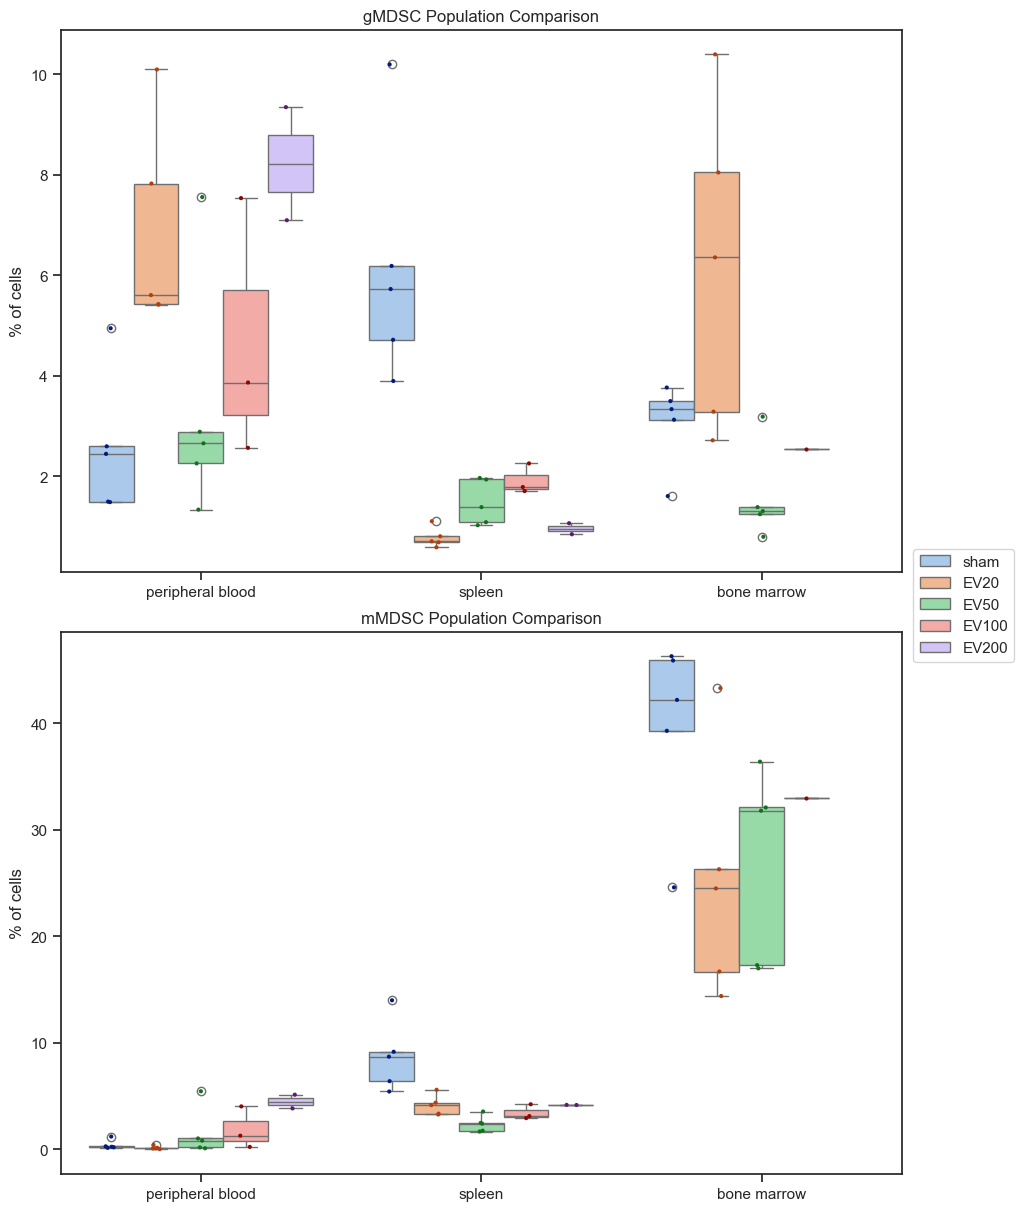

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")
# sns.set_theme(style="ticks", palette="Set1")

fig, axs = plt.subplots(2, 1, figsize=(9, 12), layout='constrained')

for i, pop in enumerate(('gMDSC', 'mMDSC')):
  data = df1.loc[
      (df1['group'] != 'control') & (df1['population'] == pop)
    ]
  g = sns.boxplot(
    data,
    x="organ", y="Statistic",
    hue="group",
    ax=axs[i],
  )

  sns.stripplot(
    data,
    x="organ", y="Statistic",
    hue="group", palette='dark',
    size=3, dodge=True,
    ax=axs[i],
    legend=False
  )
  g.set_title(f'{pop} Population Comparison')
  g.set_ylabel('% of cells')
  g.set_xlabel('')
  axs[i].legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()

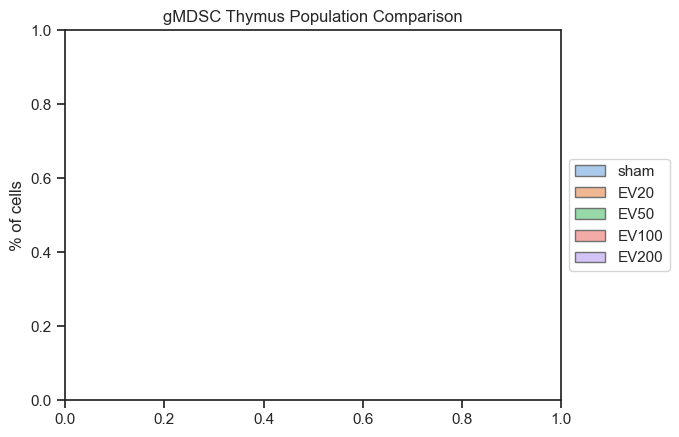

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")
# sns.set_theme(style="ticks", palette="Set1")


data = df1.loc[
    (df1['group'] != 'control') & (df1['population'] == 'gMDSC') & (df1['organ'] == 'thymus')
  ]
g = sns.boxplot(
  data,
  x="organ", y="Statistic",
  hue="group",
)

sns.stripplot(
  data,
  x="organ", y="Statistic",
  hue="group", palette='dark',
  size=3, dodge=True,
  legend=False
)
g.set_title('gMDSC Thymus Population Comparison')
g.set_ylabel('% of cells')
g.set_xlabel('')
g.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=None)

plt.show()